# Customer Churn Predition
**In this project, we will predict whether a customer will leave the bank or not based on many factors**

Following Factors are:
1. Credit score
2. Location of the Customer
3. Gender
4. Age
5. Tenure
6. Account Balance
7. Number of Bank Products Customer Uses
8. Has Credit Card
9. Is Active Member
10. Estimated Salary

#### Importing the essential libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

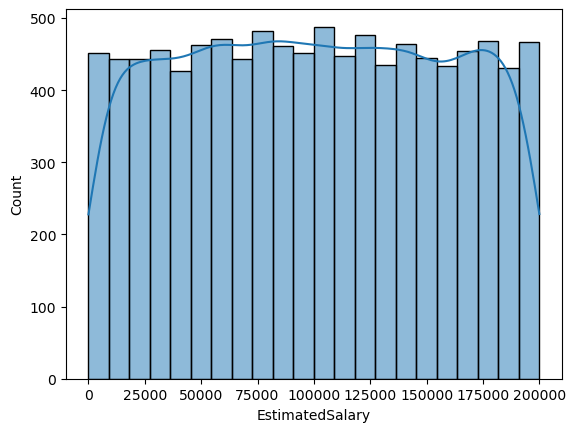

In [47]:
sns.histplot(df.EstimatedSalary, kde=True)

<Axes: xlabel='CreditScore', ylabel='Count'>

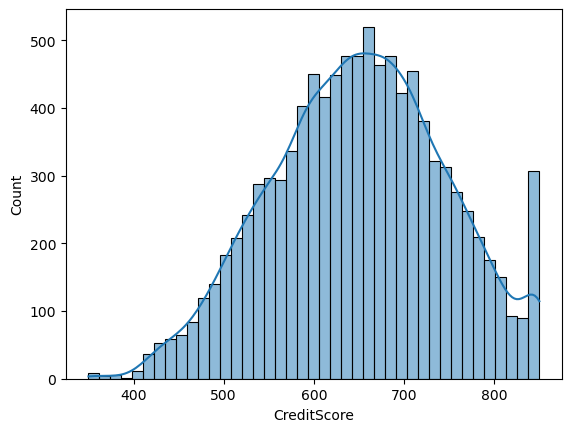

In [46]:
sns.histplot(df.CreditScore, kde=True)

<Axes: xlabel='Balance', ylabel='Count'>

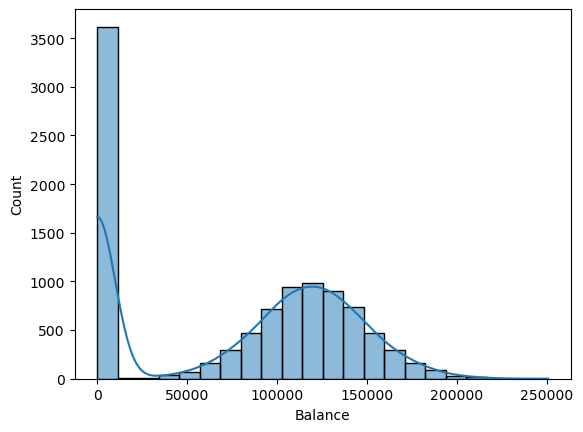

In [60]:
sns.histplot(df.Balance, kde=True)

In [ ]:
sns.histplot(df.Age, kde=True)

In [55]:
print(df.Age.unique())
print(df.CreditScore.unique())

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
[15634602 15647311 15619304 ... 15584532 15682355 15628319]


### 1. Feature Engineering

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [6]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
# Including only Potential Predictors as independent varibles
final_df = df.drop(["RowNumber", "CustomerId", "Surname"], axis="columns")
final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Building the model

In [10]:
# Converting the categorical variables into numerical variables and avoiding Dummy Variable Trap
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


<Axes: >

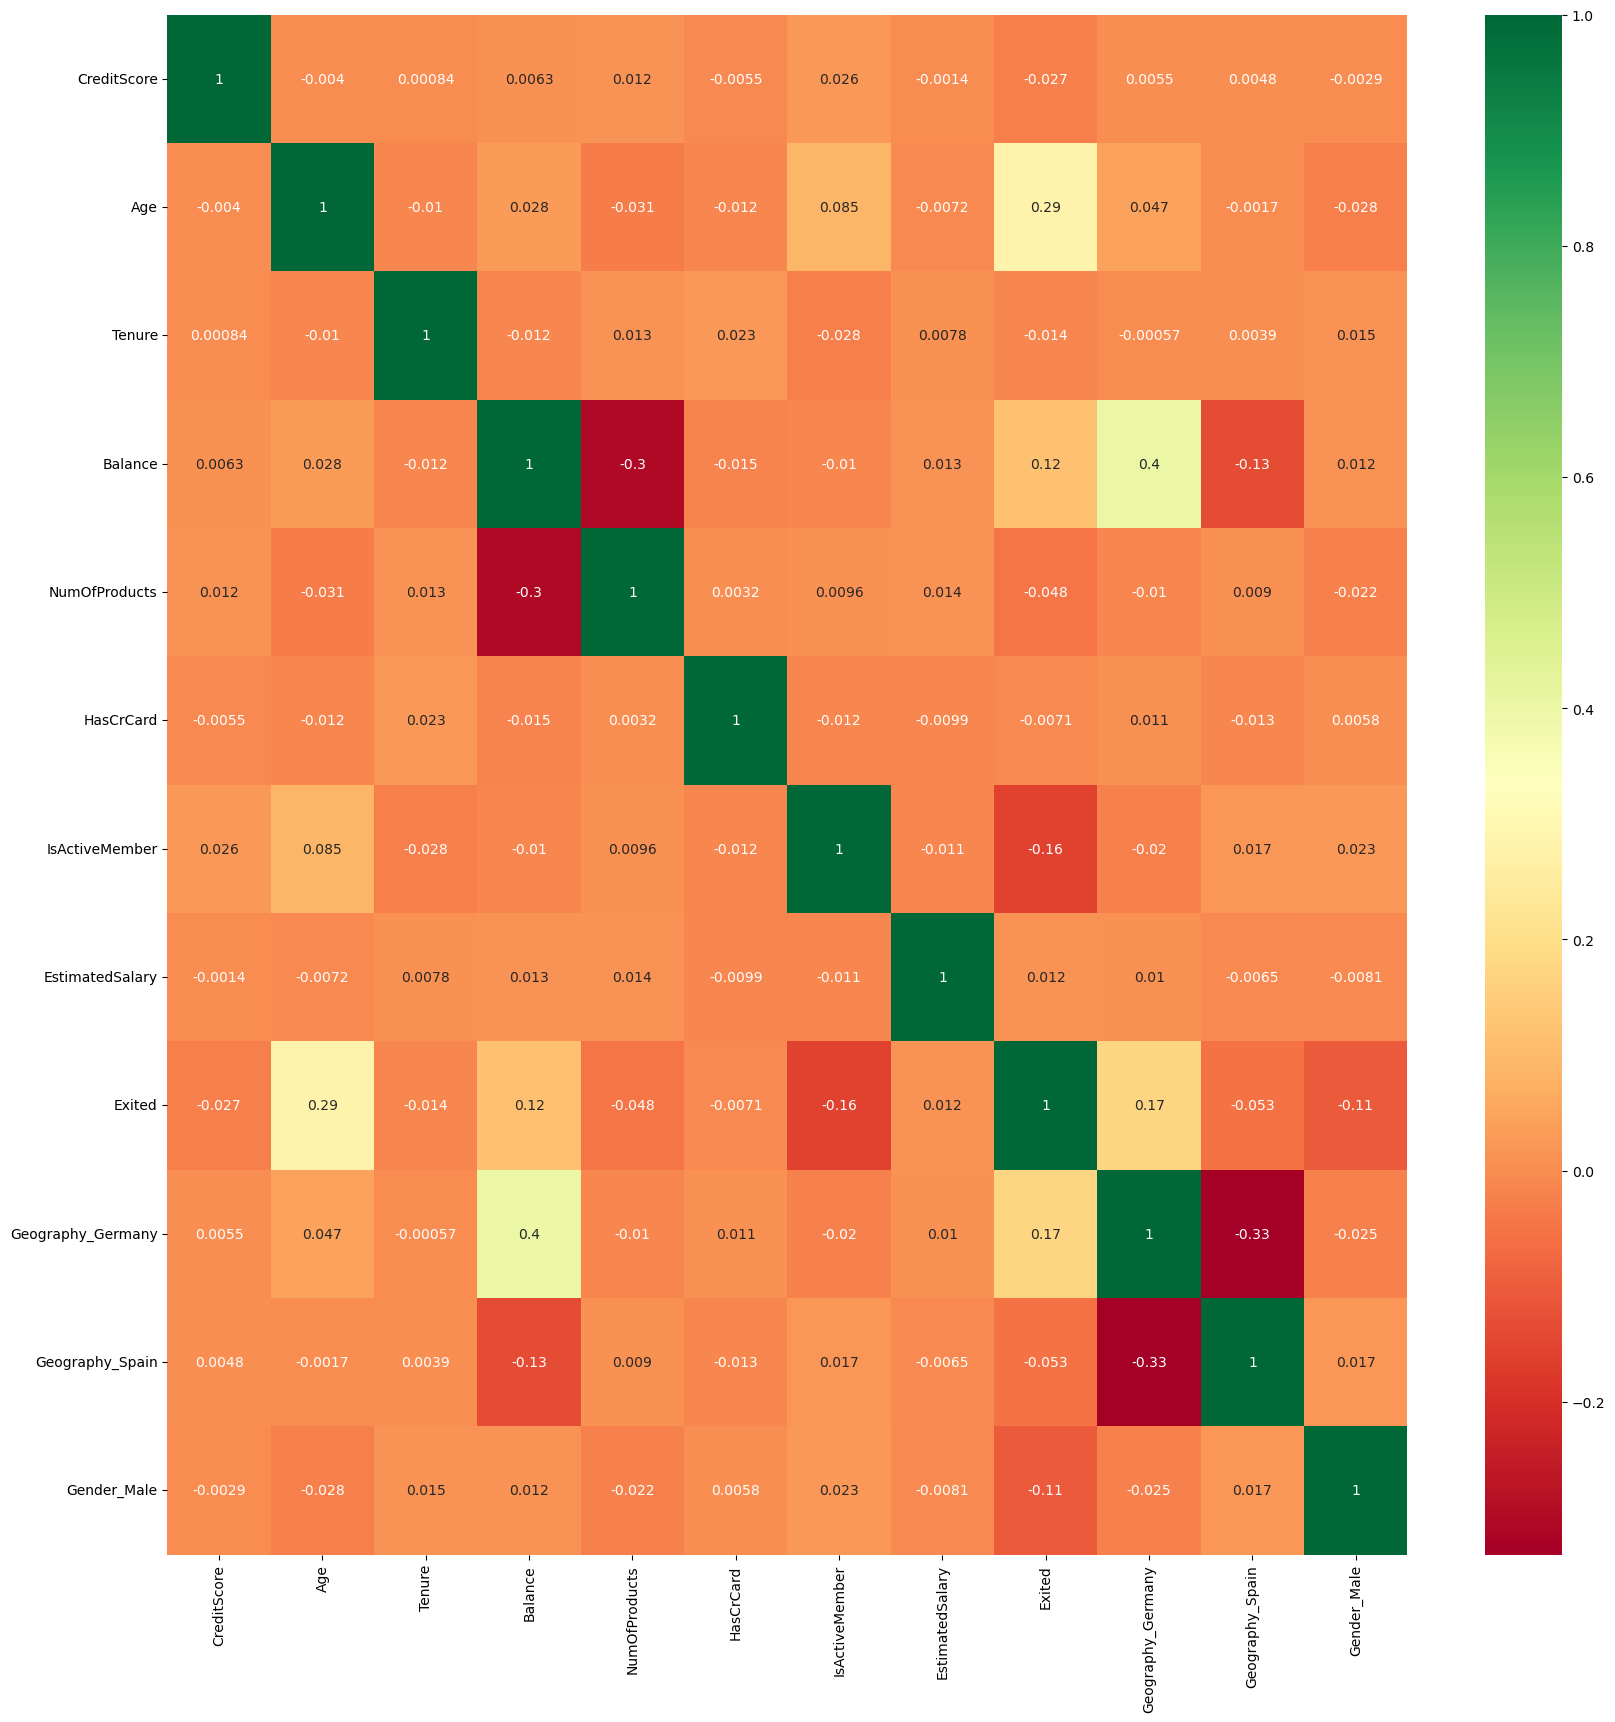

In [11]:
# Plotting The Correlations between all the features
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

**From the heatmap , we find that the Age, Balance and the Geography of the Customer are Most important features**

In [12]:
# Splitting the Dataset in Dependent and Independent Variables
X = final_df.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_df.iloc[:, 8].values

In [13]:
X.shape

(10000, 11)

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
y.shape

(10000,)

In [16]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [17]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [64]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
model.feature_importances_

array([0.11864287, 0.23410981, 0.10253921, 0.12833379, 0.14534578,
       0.03147516, 0.0465171 , 0.1182371 , 0.02858079, 0.0213235 ,
       0.02489489])

**Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8665

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print(cross_val_score(RandomForestClassifier(), X, y, cv=cv))

array([0.8675, 0.8745, 0.8635, 0.862 , 0.8615])

In [22]:
y_pred = rf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1550   57]
 [ 207  186]]
0.868


#### Exporting the model

In [24]:
# Pickling the Model
import pickle
file = open("Customer_Churn_Prediction.pkl", "wb")
pickle.dump(rf, file)